In [16]:
#%%writefile merge_df.py
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.style.use('ggplot')


import build_financial_df as fin
import build_results_df as res
merge_df_start = res.results_GE.merge(fin.finance_df, how="inner", left_on="elec-cand", right_on="ELEC-CAND")

# round values in vote% to hundreth place, should've done this earlier
merge_df_start.loc[:, 'vote%'] = merge_df_start['vote%'].round(decimals=2)

#identify Senate, and fix elec_id problem
merge_df_start.loc[(merge_df_start['office']=="US Senate"), "elec_id"] = merge_df_start['elec_id'].str.replace('-00','-SE')

# num_cand = 8868 races that survived the data cull
num_cand = merge_df_start['elec_id'].value_counts()

# 14374 candidates in merge_df_cut
# 6606 races with 2+ candidates that survived the data cull
# above calc from: merge_df_cut['elec_id'].value_counts()
num_cand_df = pd.DataFrame()
num_cand_df = num_cand[num_cand>1]
merge_df_cut = merge_df_start[merge_df_start['elec_id'].isin(num_cand_df.reset_index()['index'])]



Overwriting merge_df.py


In [ ]:
#write function to get rematch table for each item in rematch_list
def get_rematch_table(idx):
    cand_rematch = merge_df_cut[merge_df_cut.loc[:, 'new_elec_id'].isin(rematch_list[idx])]
    return cand_rematch[['FEC_ID','new_elec_id','year', 'candidate', 'candidatevotes', 'office', 'party', 'state', 'district','INC_STATUS','totalvotes', 'TTL_RECEIPTS', 'TTL_DISB']]



In [ ]:

'''
# eventually want to filter these weirdos because total vote % > 100%
sum_vote_percent = merge_df_cut.groupby('new_elec_id')['vote%'].nlargest(2).sum(level=0)
# below attempt didn't work
sum_percent_df = pd.DataFrame()
sum_percent_df = sum_vote_percent[sum_vote_percent<=100]
merge_df_cut2 = merge_df_cut[merge_df_cut['new_elec_id'].isin(sum_percent_df.reset_index()['index'])]
merge_df_cut2
'''

In [16]:
idx_lst = []
for i in range(len(rematch_list)):
    a = rematch_cut[rematch_cut['new_elec_id']==list(rematch_list[i])[0]].sort_values('FEC_ID').reset_index()
    b = rematch_cut[rematch_cut['new_elec_id']==list(rematch_list[i])[1]].sort_values('FEC_ID').reset_index()    
    
    i1 = a['index'][0]
    i2 = a['index'][1]
    i3 = b['index'][0]
    i4 = b['index'][1] 
    
    if a.loc[0,'office'] == a.loc[1,'office'] and b.loc[0,'office'] == b.loc[1,'office']:
        idx_lst.append(i1)
        idx_lst.append(i2)
        idx_lst.append(i3)
        idx_lst.append(i4)
idx_lst

[2380,
 2379,
 1628,
 1629,
 1632,
 1635,
 2384,
 2383,
 4611,
 4610,
 2427,
 2428,
 6903,
 6902,
 6061,
 6062,
 1714,
 1713,
 16039,
 16038,
 2462,
 2461,
 1720,
 1719,
 2466,
 2467,
 1724,
 1725,
 1849,
 1850,
 2593,
 2594,
 1812,
 1811,
 2534,
 2533,
 1842,
 1843,
 6235,
 6237,
 1865,
 1864,
 2614,
 2613,
 2659,
 2660,
 1912,
 1914,
 2639,
 2640,
 3367,
 3368,
 1932,
 1931,
 2680,
 2679,
 1968,
 1967,
 2711,
 2710,
 2075,
 2076,
 7243,
 7242,
 2822,
 2821,
 2078,
 2077,
 2004,
 2003,
 2748,
 2747,
 2762,
 2763,
 2017,
 2018,
 2102,
 2101,
 2842,
 2843,
 6530,
 6531,
 2104,
 2103,
 2118,
 2119,
 2861,
 2862,
 2136,
 2135,
 2875,
 2874,
 2879,
 2880,
 2140,
 2141,
 2909,
 2908,
 2169,
 2170,
 5083,
 5084,
 2182,
 2181,
 2221,
 2220,
 2956,
 2955,
 2987,
 2986,
 2250,
 2251,
 3716,
 3717,
 2262,
 2263,
 4453,
 4452,
 2271,
 2270,
 6758,
 6759,
 2299,
 2298,
 3099,
 3098,
 2351,
 2352,
 3112,
 3111,
 2367,
 2368,
 2405,
 2406,
 3145,
 3146,
 3161,
 3162,
 2424,
 2423,
 2459,
 2460,
 319

In [19]:
len(idx_lst)
#rematch_cut[rematch_cut.index.isin(idx_lst)]

2384

In [4]:
#for i in range(len(rematch_list)):
for i in range(9,190):
    a = rematch_cut[rematch_cut['new_elec_id']==list(rematch_list[i])[0]].sort_values('FEC_ID').reset_index()
    b = rematch_cut[rematch_cut['new_elec_id']==list(rematch_list[i])[1]].sort_values('FEC_ID').reset_index()
    i1 = a['index'][0]
    i2 = a['index'][1]
    i3 = b['index'][0]
    i4 = b['index'][1]
    a.set_index('candidate')
    b.set_index('candidate')

    if a.loc[0,'office'] == a.loc[1,'office'] and b.loc[0,'office'] == b.loc[1,'office']:
        print('yay')
        x = a['vote%']-b['vote%']
        rematch_cut.loc[i1, 'delta_vote'] = x[0]
        rematch_cut.loc[i2, 'delta_vote'] = x[1]
        y = a['TTL_DISB']-b['TTL_DISB']
        rematch_cut.loc[i3, 'delta_spend'] = y[0]
        rematch_cut.loc[i4, 'delta_spend'] = y[1]
    else:
        rematch_cut.loc[i1, 'delta_vote'] = 86
        rematch_cut.loc[i2, 'delta_vote'] = 86
        rematch_cut.loc[i3, 'delta_spend'] = 86
        rematch_cut.loc[i4, 'delta_spend'] = 86

yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay


In [338]:
rematch_test = rematch_cut[rematch_cut['delta_vote']!=86]
rematch3 = rematch_test[~rematch_test['delta_vote'].isna()]
rematch4 = rematch3[rematch3['delta_vote']!=0]

In [342]:
rematch_GOP = rematch4[rematch4['party']=='republican']
rematch_Dem = rematch4[rematch4['party']=='democrat']
rematch_Ind = rematch4[(rematch4['party']!='democrat') & (rematch4['party']!='republican')]

In [ ]:
rematch4[rematch4['party']=='republican']

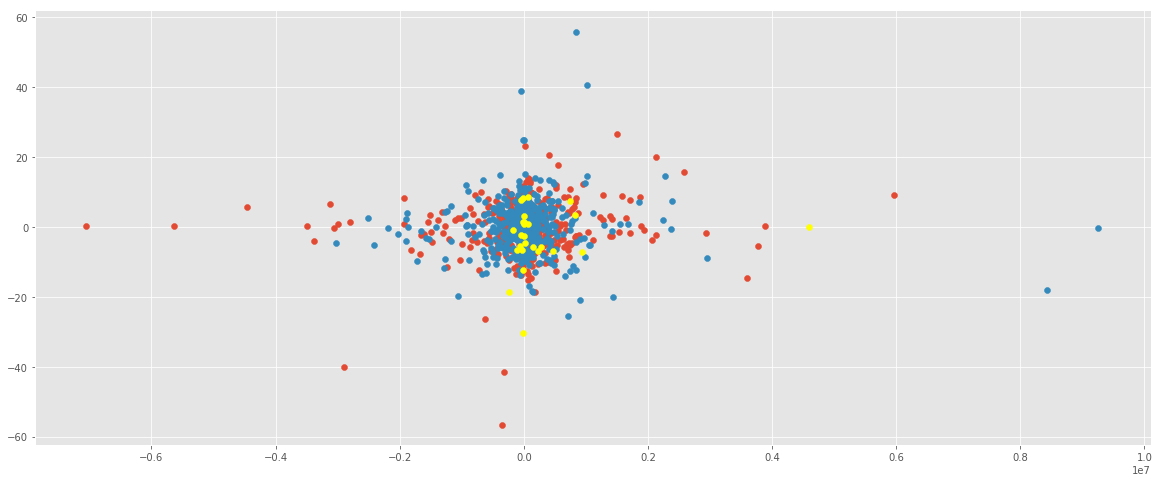

In [346]:
plot_GOP = rematch_GOP[['delta_vote', 'delta_spend']]
plot_Dem = rematch_Dem[['delta_vote', 'delta_spend']]
plot_Ind = rematch_Ind[['delta_vote', 'delta_spend']]

x = plot_GOP['delta_vote']
y = plot_GOP['delta_spend']
w = plot_Dem['delta_vote']
z = plot_Dem['delta_spend']
t = plot_Ind['delta_vote']
u = plot_Ind['delta_spend']

fig, ax = plt.subplots(1, figsize=(20,8))
ax.scatter(y, x)
ax.scatter(z, w)
ax.scatter(u, t, color='yellow')


In [347]:
def plot_state(state_name):
    state_df = rematch4[rematch4['state']== state_name]
    plot_state = state_df[['delta_vote', 'delta_spend']]
    x = plot_state['delta_spend']
    y = plot_state['delta_vote']
    fig, ax = plt.subplots(1, figsize=(20,8))
    ax.scatter(x, y)

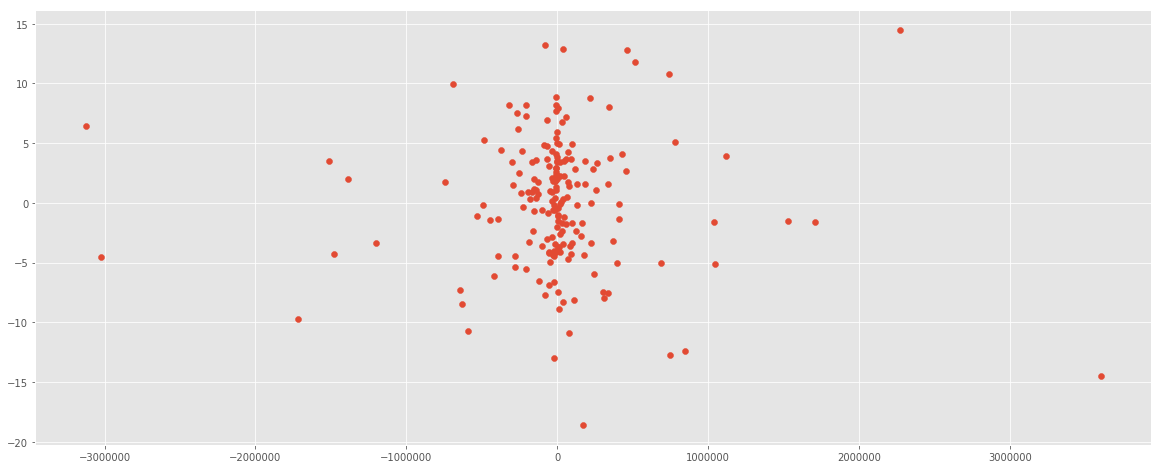

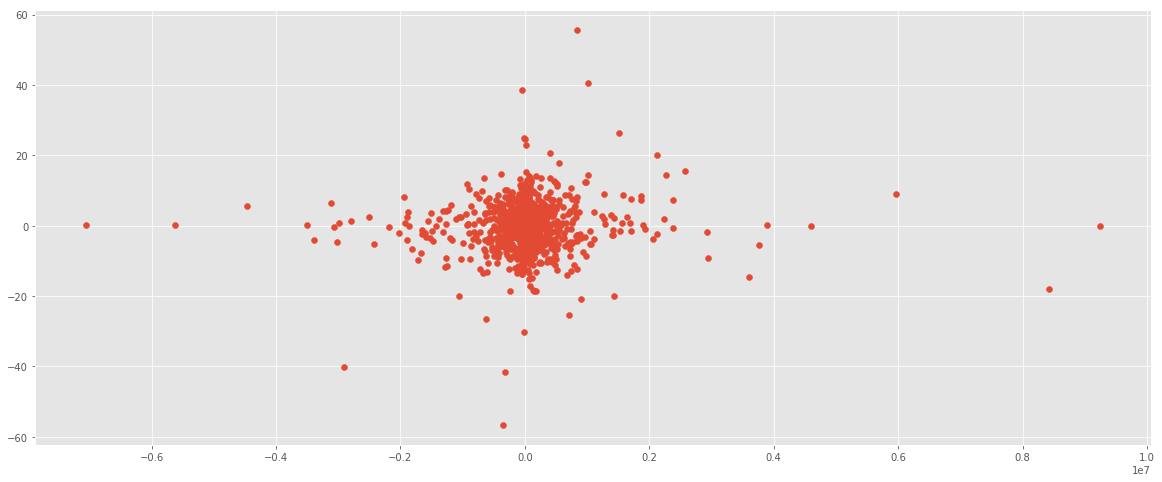

In [295]:
awesome = rematch_cut[rematch_cut['delta_vote']!=0]
test_plot_df = awesome[['delta_vote', 'delta_spend']]

x = test_plot_df['delta_vote']
y = test_plot_df['delta_spend']

fig, ax = plt.subplots(1, figsize=(20,8))
ax.scatter(y, x)

In [284]:
rematch_cut.shape

(13094, 16)

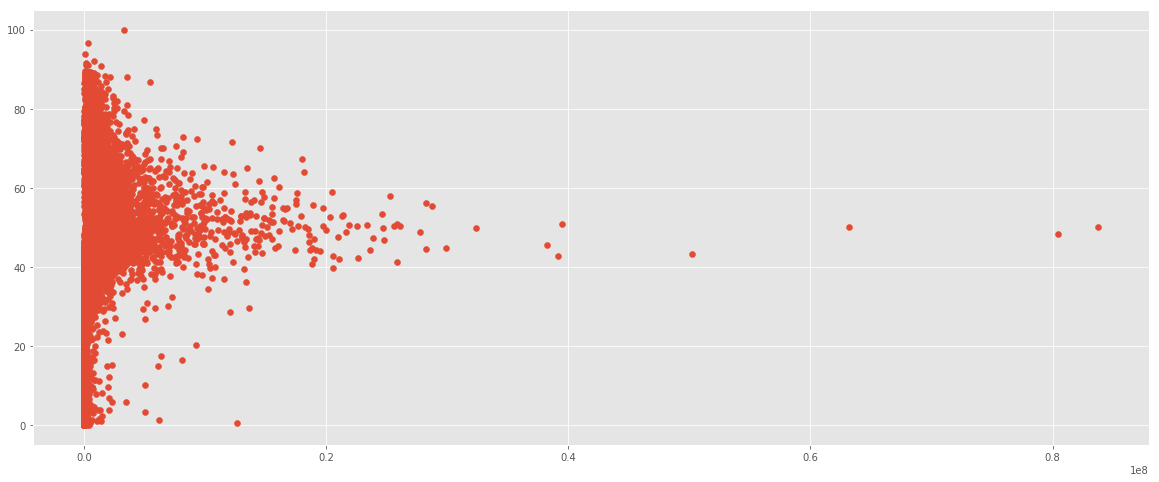

In [353]:
plot_money = merge_df_cut[['vote%', 'TTL_DISB']]
x = plot_money['TTL_DISB']
y = plot_money['vote%']

fig, ax = plt.subplots(1, figsize=(20,8))
ax.scatter(x,y)

In [264]:
save = rematch_cut.copy()

In [259]:
'''for i in range(len(rematch_list)):
    a = rematch_cut[rematch_cut['new_elec_id']==list(rematch_list[i])[0]]
    b = rematch_cut[rematch_cut['new_elec_id']==list(rematch_list[i])[1]]
    a.set_index('candidate')
    b.set_index('candidate')'''
''' i1 = a['index'][0]
    i2 = a['index'][1]
    i3 = b['index'][0]
    i4 = b['index'][1]

    #calc delta_vote
    if a.loc[0,'office'] == a.loc[1,'office']:
        d_vote = a.loc[0, 'vote%'] - b.loc[0,'vote%']
        rematch_cut.loc[i1, 'delta_vote'] = d_vote
        rematch_cut.loc[i3, 'delta_vote'] = 0    

        d2_vote = a.loc[1, 'vote%'] - b.loc[1,'vote%']
        rematch_cut.loc[i2, 'delta_vote'] = d2_vote
        rematch_cut.loc[i4, 'delta_vote'] = 0 
    else: 
        rematch_cut.loc[i1, 'delta_vote'] = None
        rematch_cut.loc[i3, 'delta_vote'] = None
        rematch_cut.loc[i2, 'delta_vote'] = None
        rematch_cut.loc[i4, 'delta_vote'] = None 

    # calc delta_spend
    if a.loc[0,'office'] == a.loc[1,'office']:
        d_vote = a.loc[0, 'TTL_DISB'] - b.loc[0,'TTL_DISB']
        rematch_cut.loc[i1, 'delta_spend'] = d_vote
        rematch_cut.loc[i3, 'delta_spend'] = 0    

        d2_vote = a.loc[1, 'TTL_DISB'] - b.loc[1,'TTL_DISB']
        rematch_cut.loc[i2, 'delta_spend'] = d2_vote
        rematch_cut.loc[i4, 'delta_spend'] = 0 
    else: 
        rematch_cut.loc[i1, 'delta_spend'] = None
        rematch_cut.loc[i3, 'delta_spend'] = None
        rematch_cut.loc[i2, 'delta_spend'] = None
        rematch_cut.loc[i4, 'delta_spend'] = None '''

8396

In [ ]:
'''
Version that worked

### get data for delta_vote & delta_spend

for i in range(len(rematch_list)):
#for i in [1]:
    a = rematch_cut[rematch_cut['new_elec_id']==list(rematch_list[i])[0]].sort_values('FEC_ID').reset_index()
    b = rematch_cut[rematch_cut['new_elec_id']==list(rematch_list[i])[1]].sort_values('FEC_ID').reset_index()
    i1 = a['index'][0]
    i2 = a['index'][1]
    i3 = b['index'][0]
    i4 = b['index'][1]
    
    print(a)
    #calc delta_vote
    if a.loc[0,'office'] == a.loc[1,'office']:
        print(f"this should be good {i}")
        d_vote = a.loc[0, 'vote%'] - b.loc[0,'vote%']
        rematch_cut.loc[i1, 'delta_vote'] = d_vote
        rematch_cut.loc[i3, 'delta_vote'] = 0    

        d2_vote = a.loc[1, 'vote%'] - b.loc[1,'vote%']
        rematch_cut.loc[i2, 'delta_vote'] = d2_vote
        rematch_cut.loc[i4, 'delta_vote'] = 0 
    else:
        rematch_cut.loc[i1, 'delta_vote'] = None
        rematch_cut.loc[i3, 'delta_vote'] = None
        rematch_cut.loc[i2, 'delta_vote'] = None
        rematch_cut.loc[i4, 'delta_vote'] = None 

    # calc delta_spend
    if a.loc[0,'office'] == a.loc[1,'office']:
        d_vote = a.loc[0, 'TTL_DISB'] - b.loc[0,'TTL_DISB']
        rematch_cut.loc[i1, 'delta_spend'] = d_vote
        rematch_cut.loc[i3, 'delta_spend'] = 0    

        d2_vote = a.loc[1, 'TTL_DISB'] - b.loc[1,'TTL_DISB']
        rematch_cut.loc[i2, 'delta_spend'] = d2_vote
        rematch_cut.loc[i4, 'delta_spend'] = 0 
    else: 
        rematch_cut.loc[i1, 'delta_spend'] = None
        rematch_cut.loc[i3, 'delta_spend'] = None
        rematch_cut.loc[i2, 'delta_spend'] = None
        rematch_cut.loc[i4, 'delta_spend'] = None


'''